In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, box
import matplotlib.image as mpimg


In [2]:
rufous_hummingbird_df = pd.read_csv("../../day09/data/rufous_hummingbird.csv")

In [3]:
rufous_hummingbird_df["datetime"] = pd.to_datetime(rufous_hummingbird_df.Year*10000+rufous_hummingbird_df.Month*100+rufous_hummingbird_df.Day,format='%Y%m%d')

In [4]:
rufous_hummingbird_df = rufous_hummingbird_df.dropna(subset=["LATITUDE", "LONGITUDE"])

In [5]:
rufous_hummingbird_gdf = gpd.GeoDataFrame(rufous_hummingbird_df, geometry=gpd.points_from_xy(rufous_hummingbird_df.LONGITUDE, rufous_hummingbird_df.LATITUDE), crs="EPSG:4326")

In [6]:
polygon = box(-126, 32, -113, 50)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=4326)

In [7]:
# poly_gdf.explore()

In [8]:
rufous_hummingbird_gdf = gpd.clip(rufous_hummingbird_gdf, poly_gdf)

In [9]:
# annas_hummingbird_2022_gdf = annas_hummingbird_gdf[annas_hummingbird_gdf["Year"] == 2022.0]"

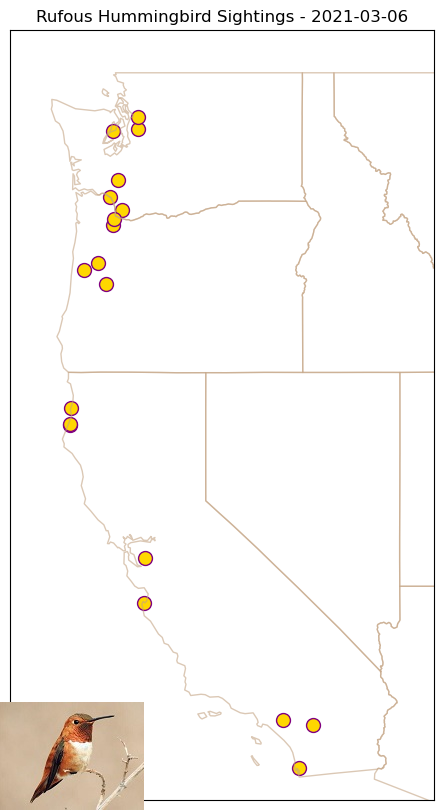

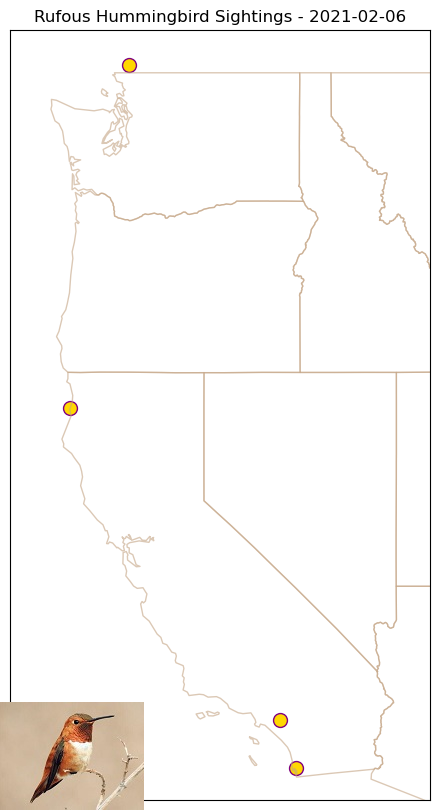

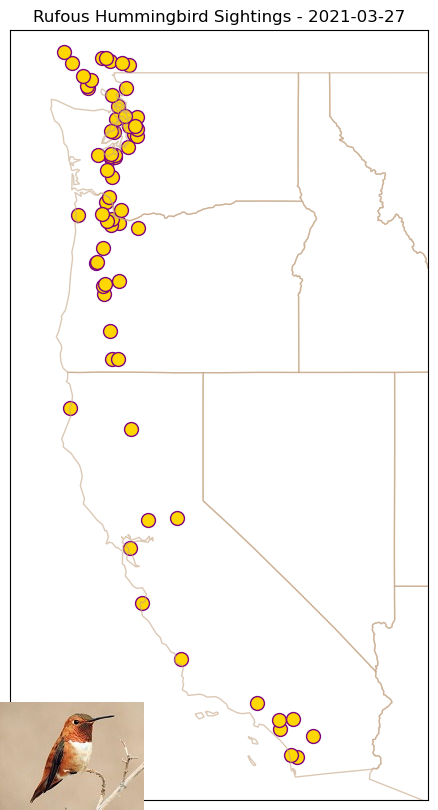

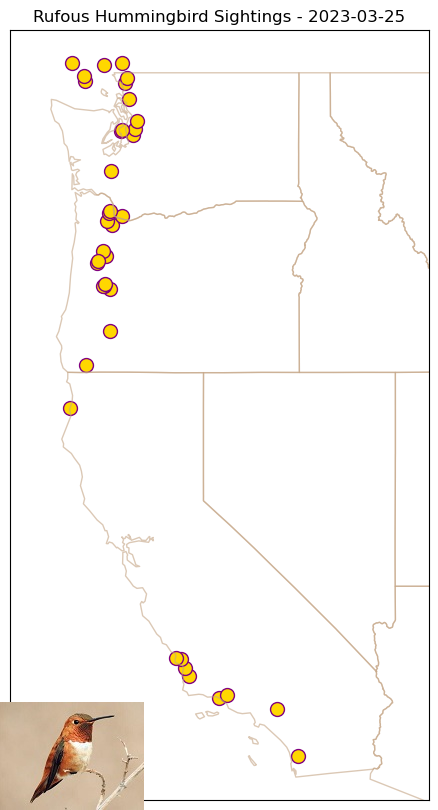

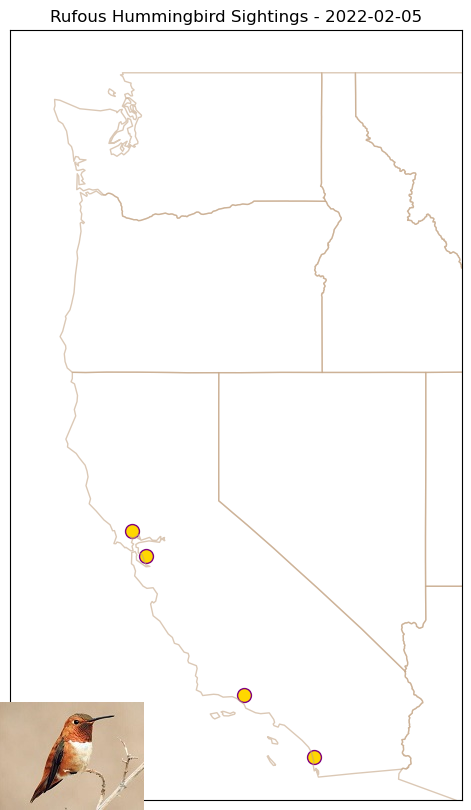

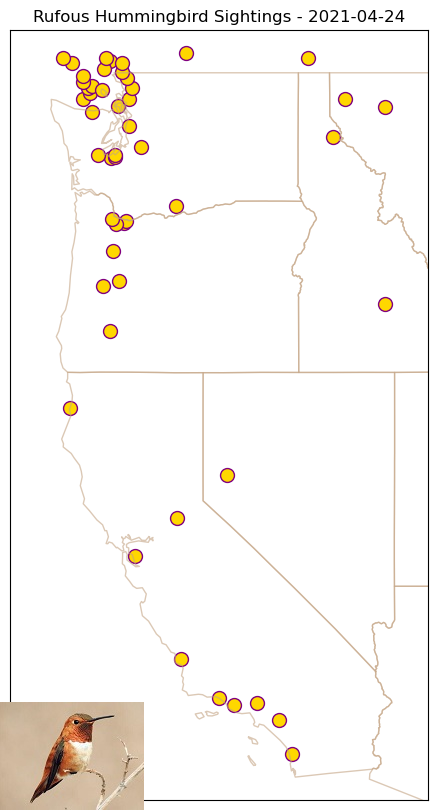

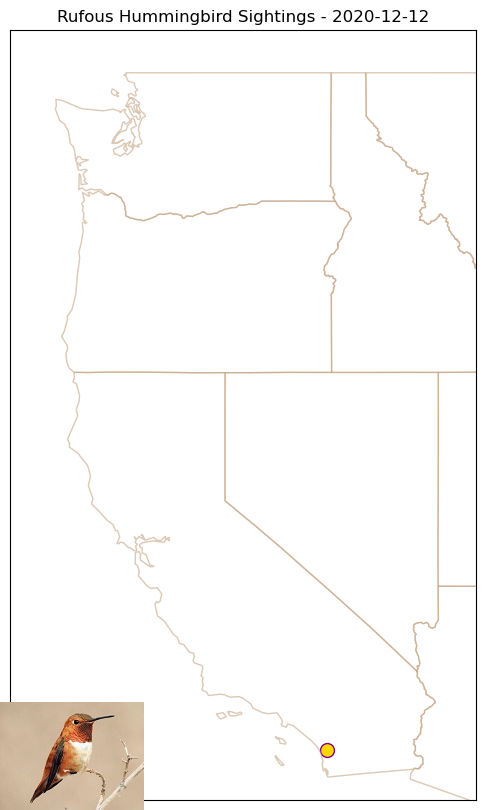

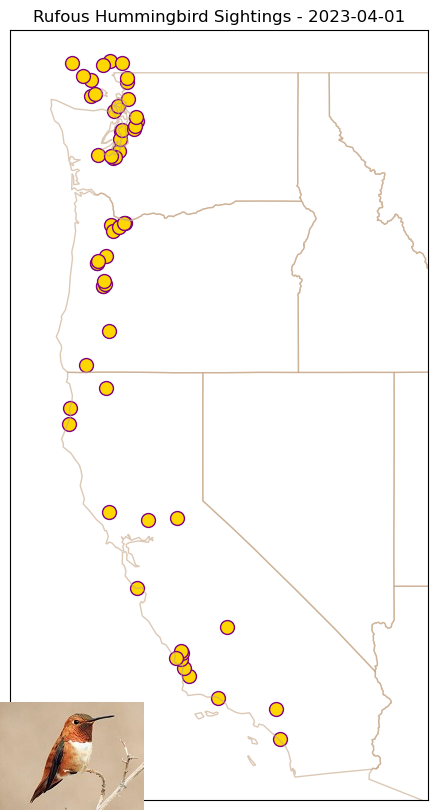

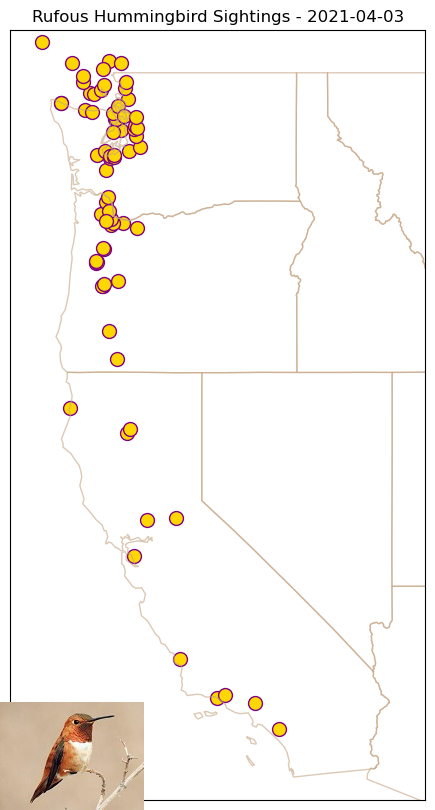

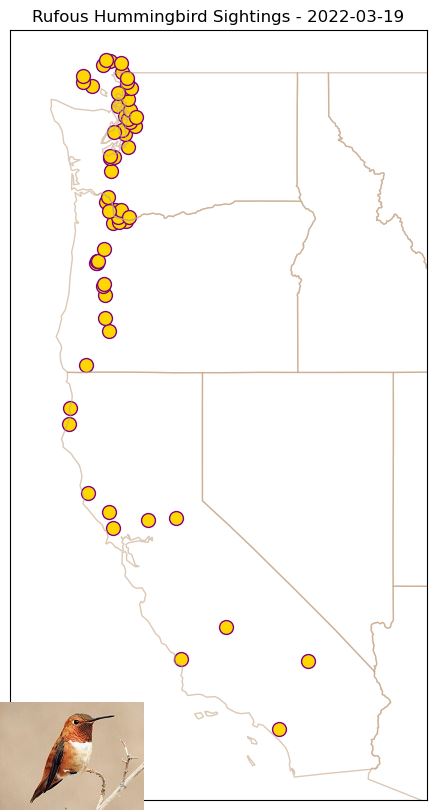

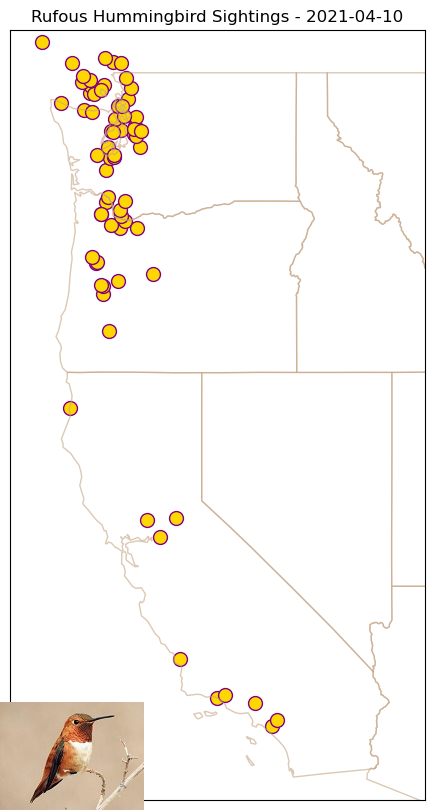

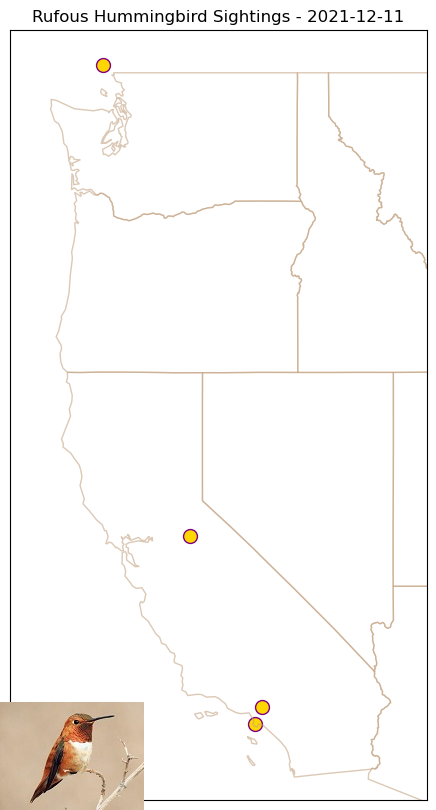

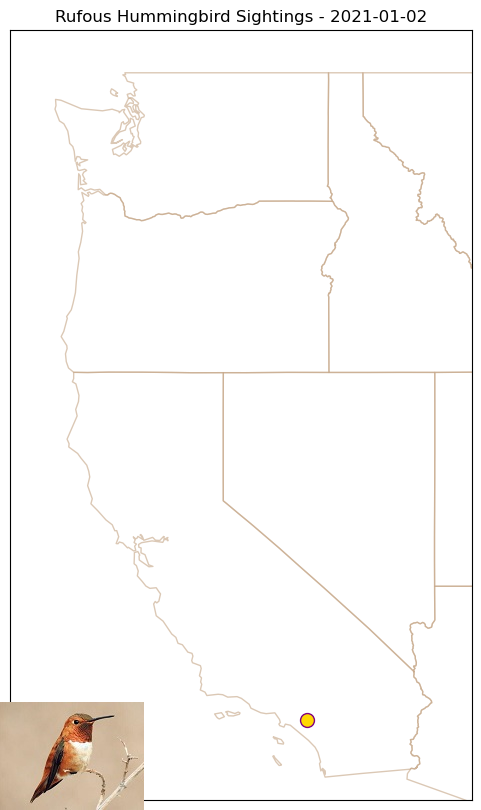

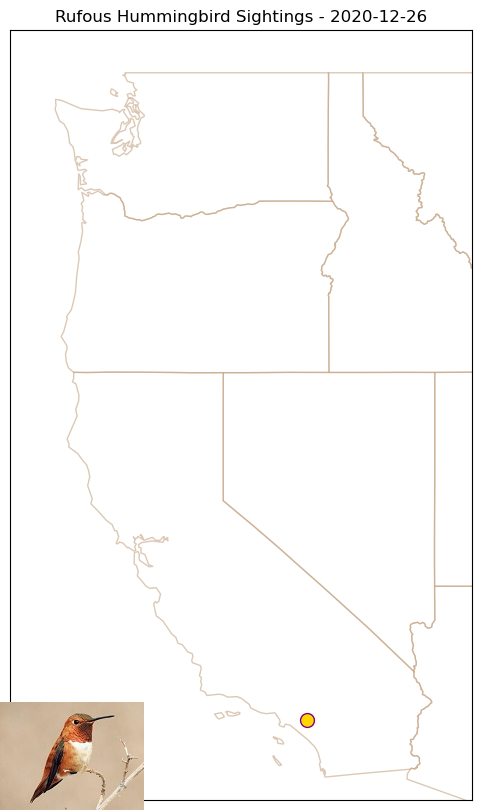

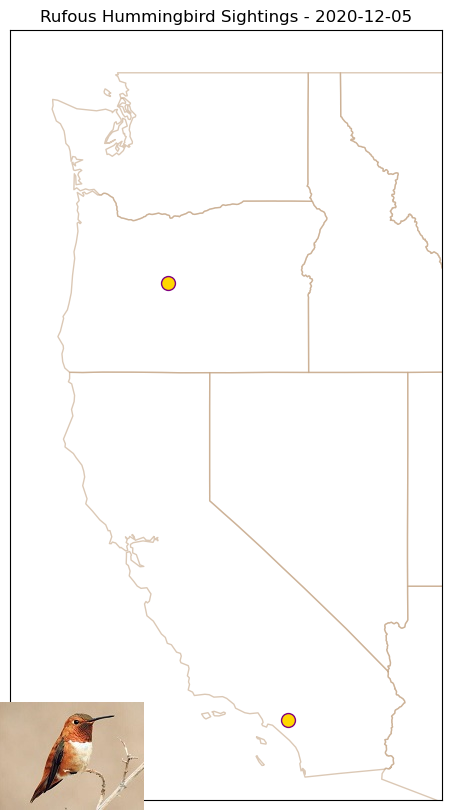

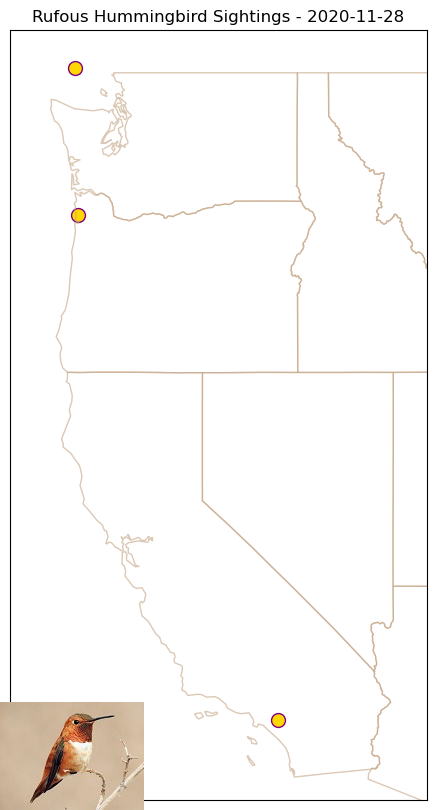

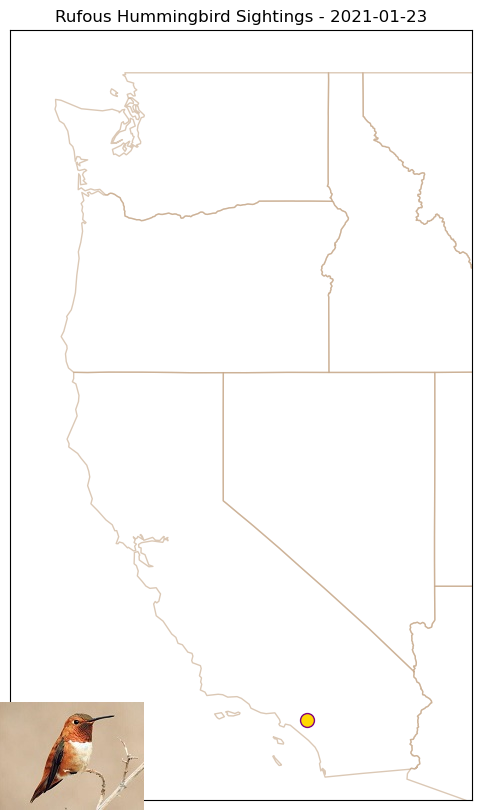

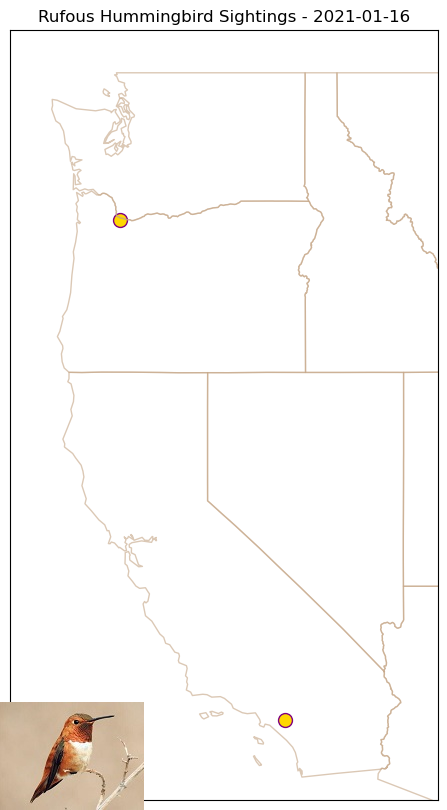

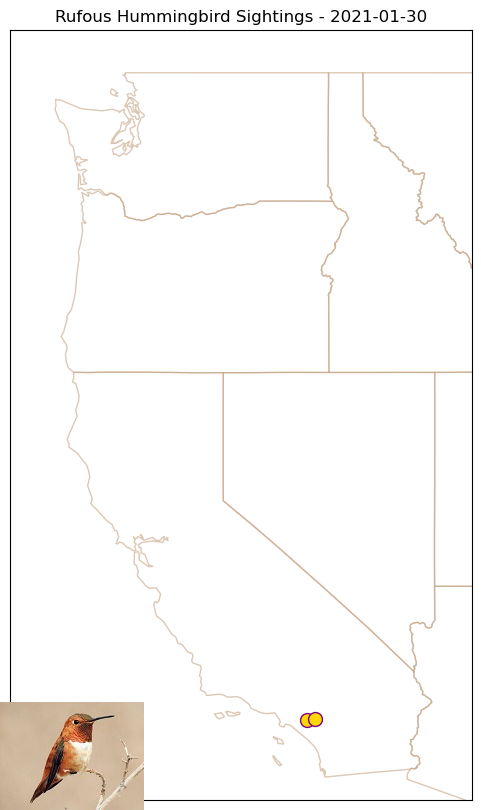

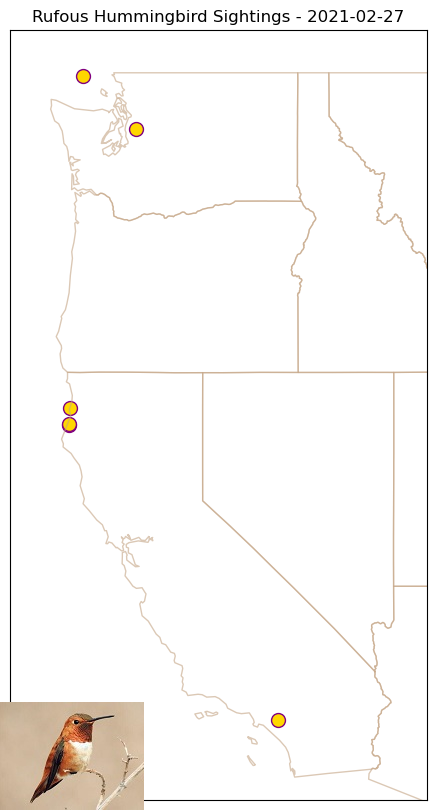

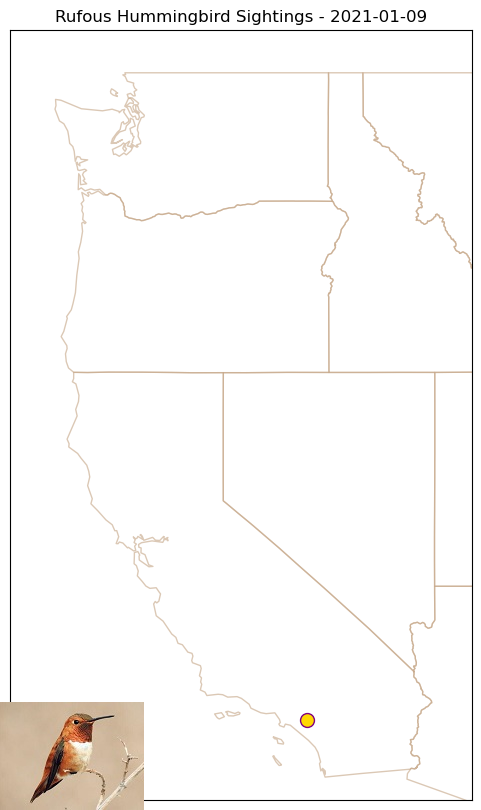

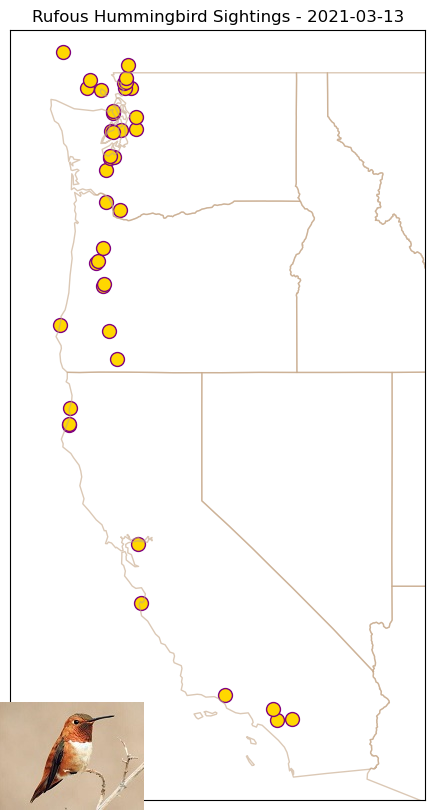

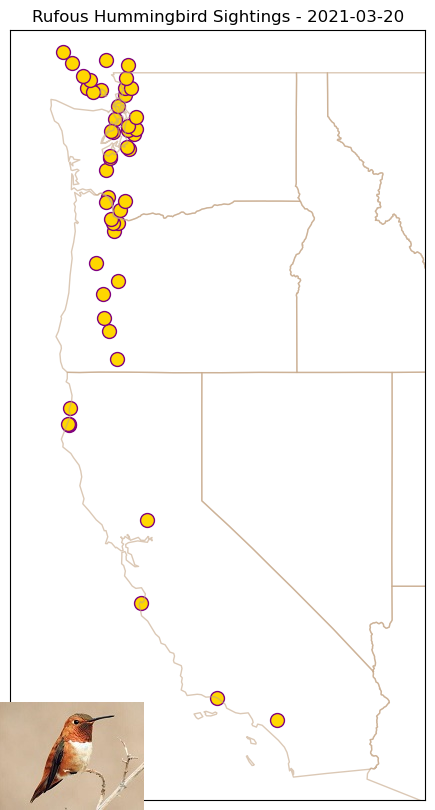

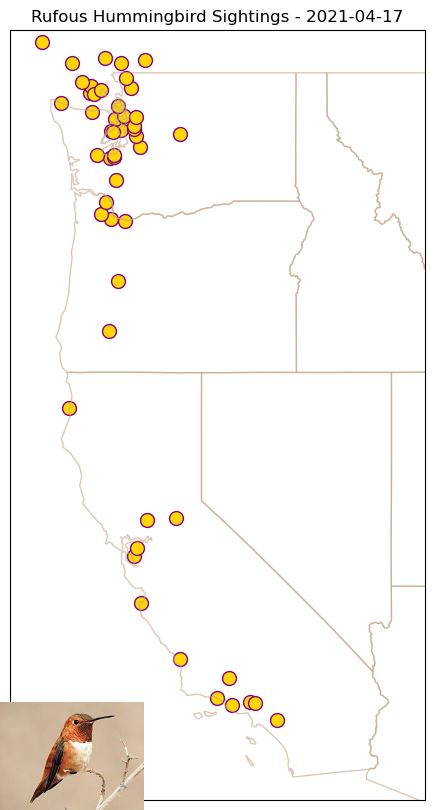

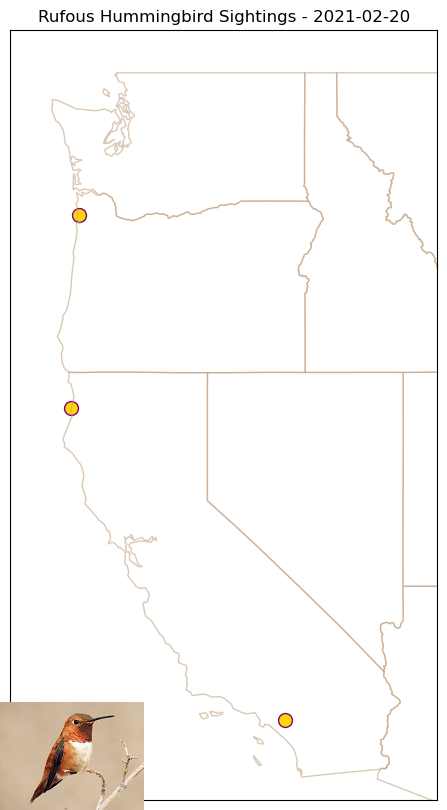

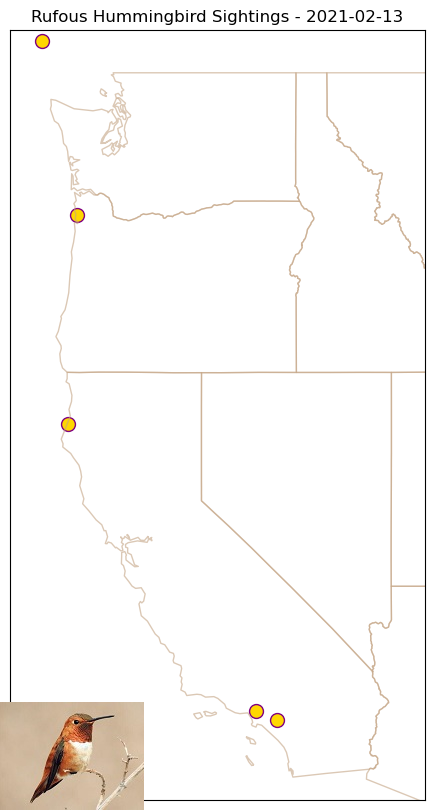

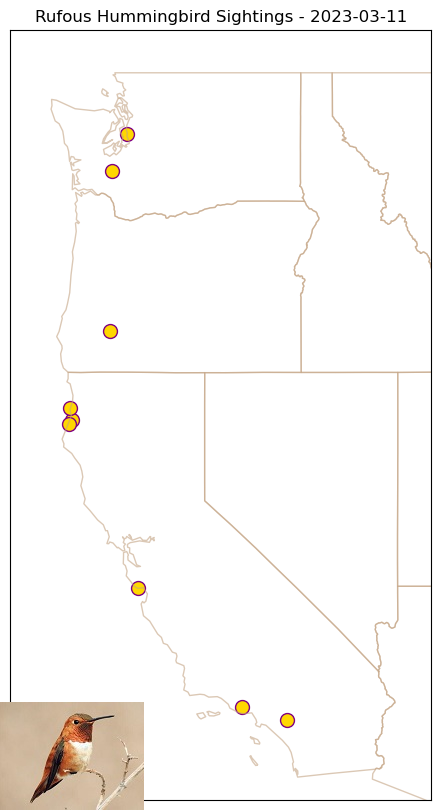

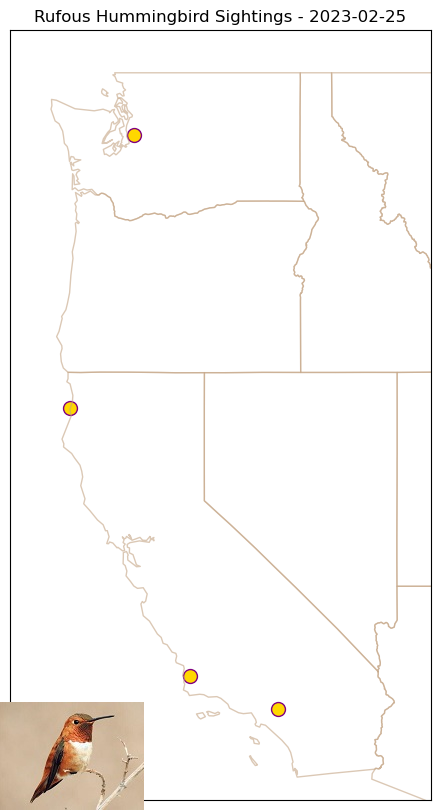

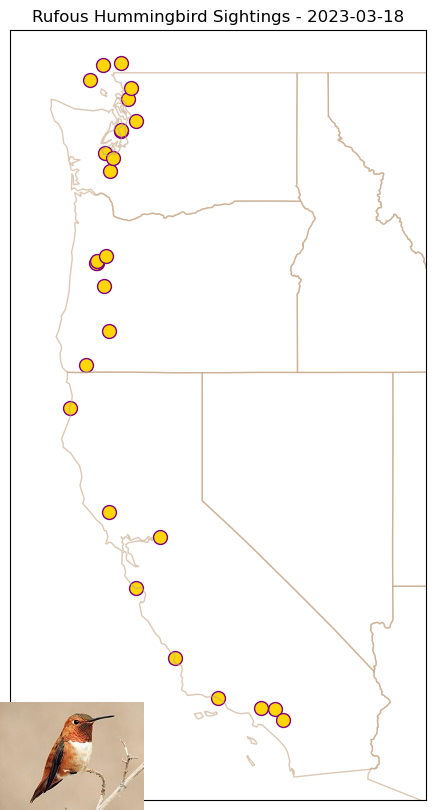

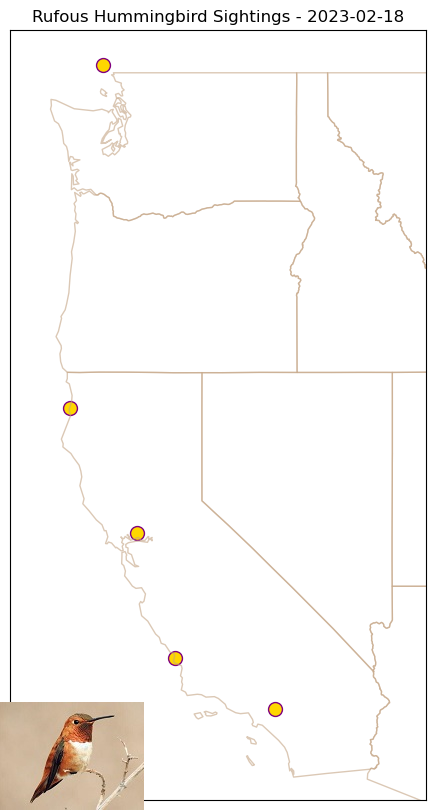

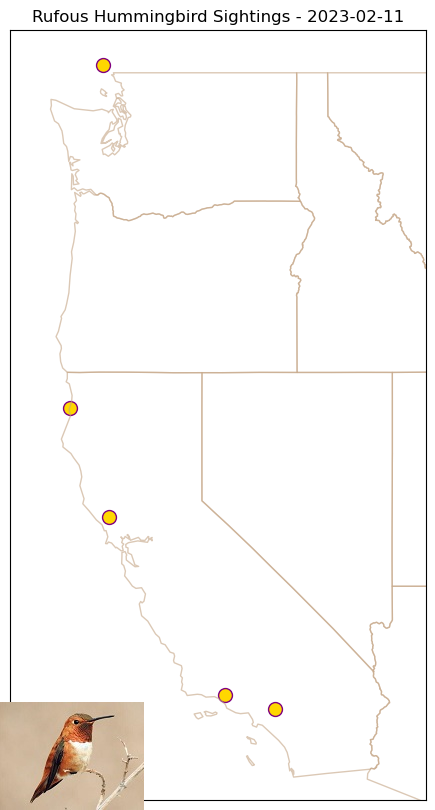

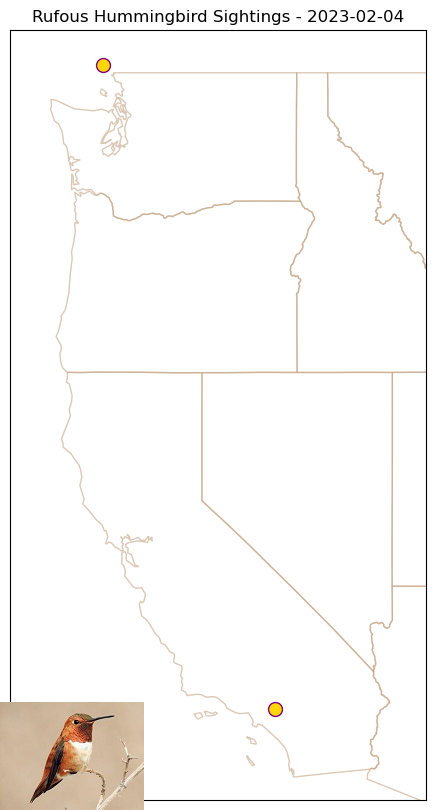

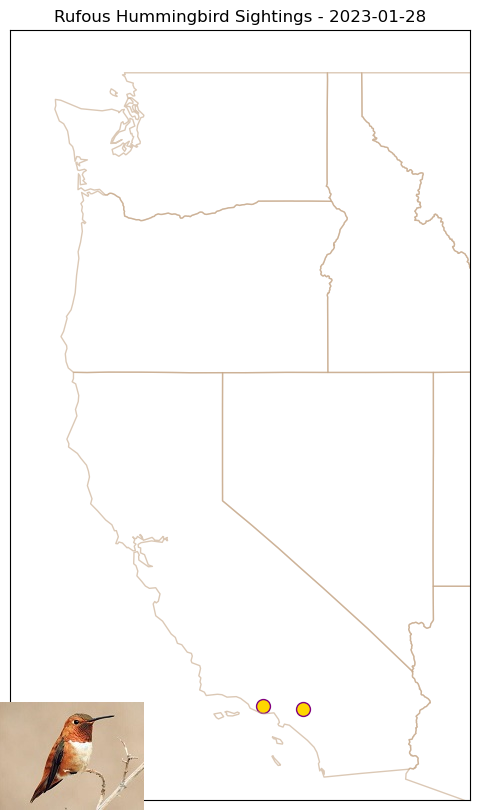

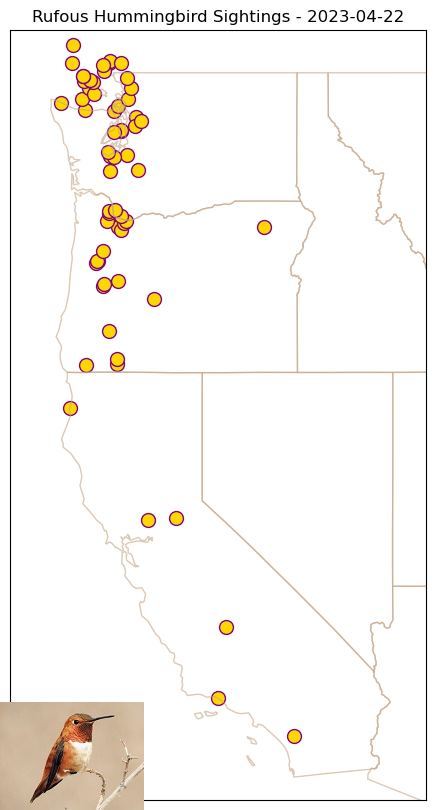

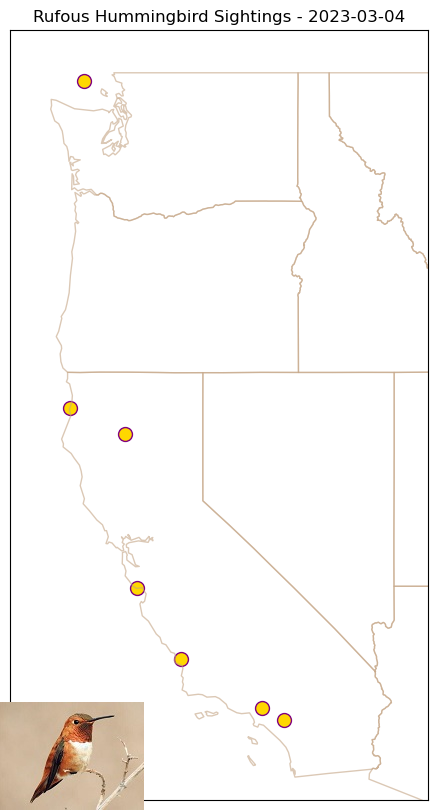

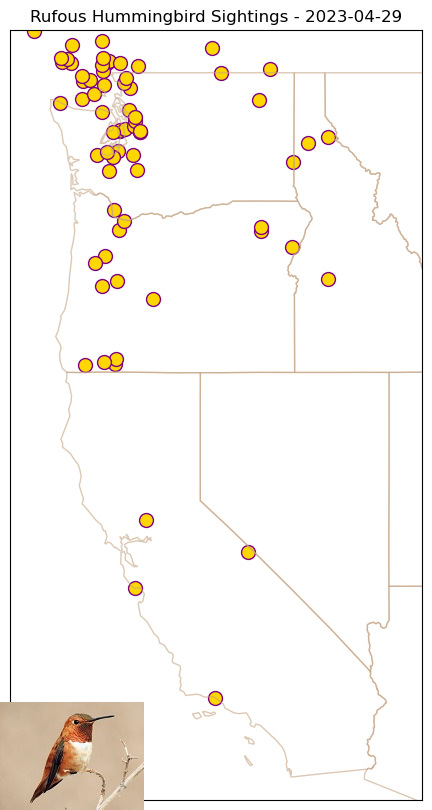

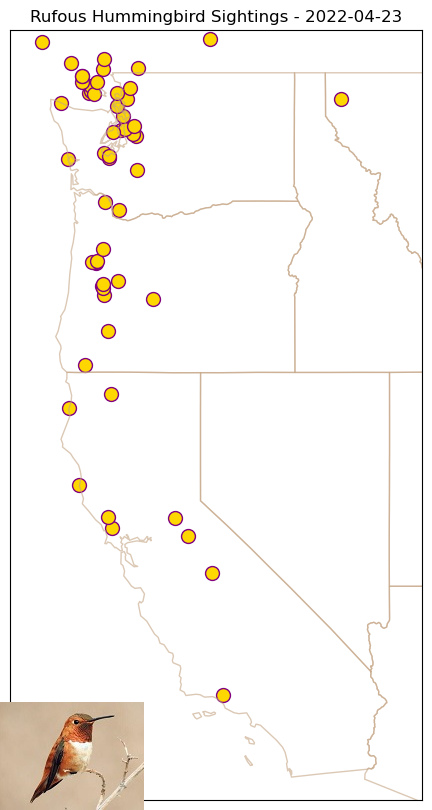

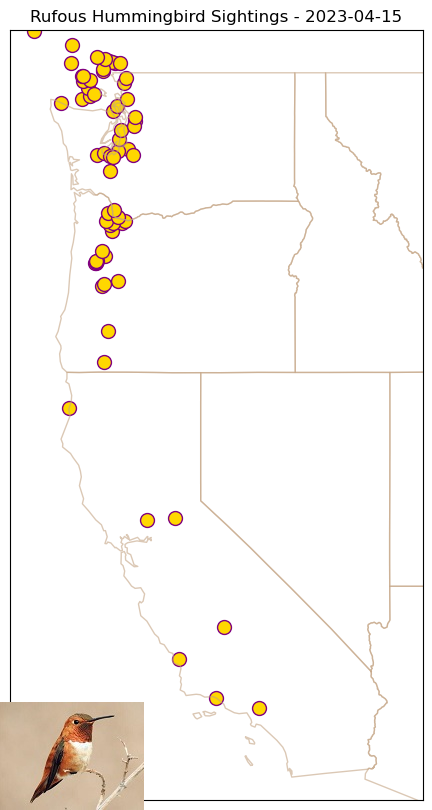

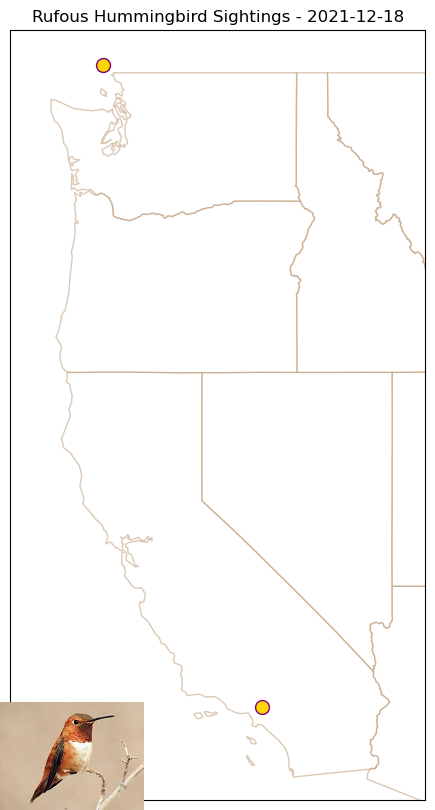

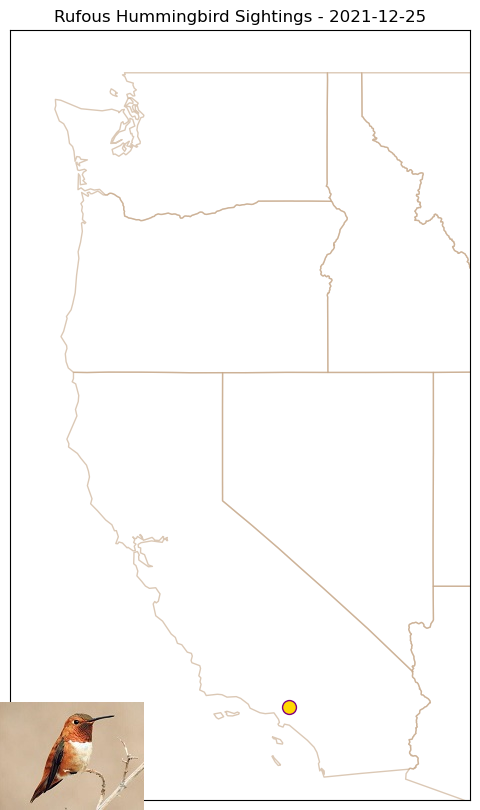

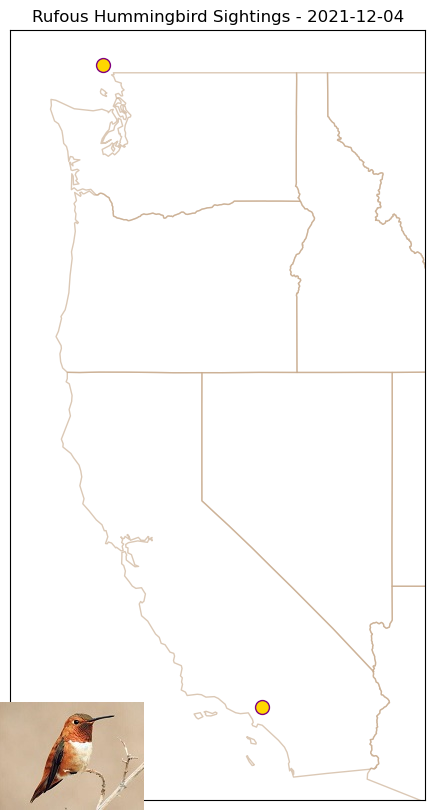

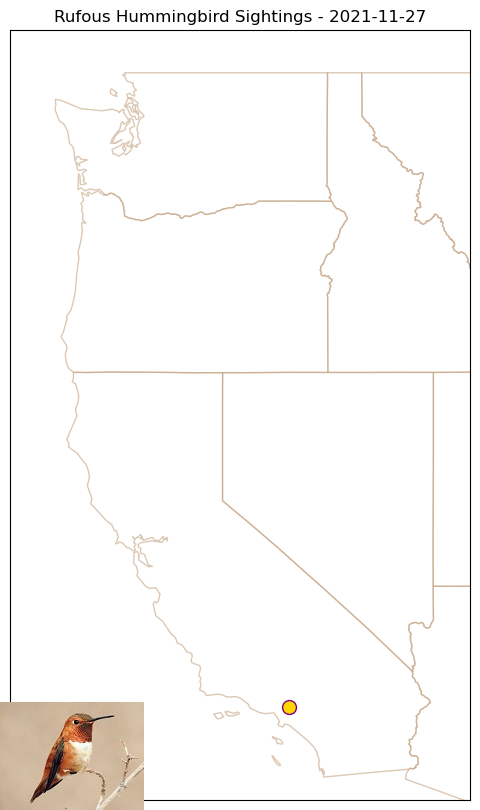

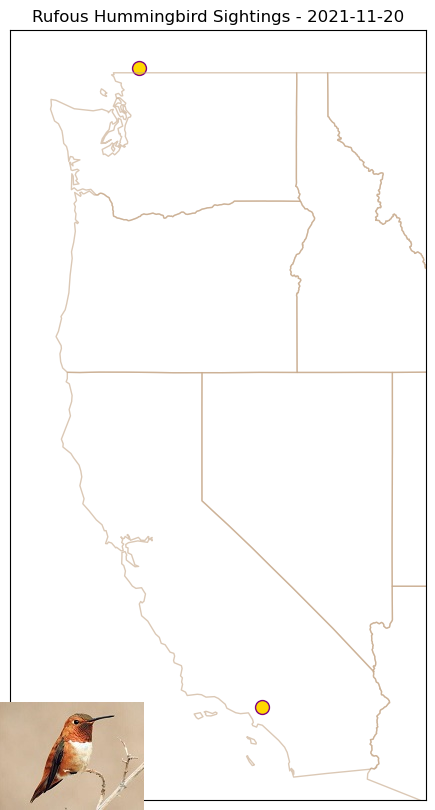

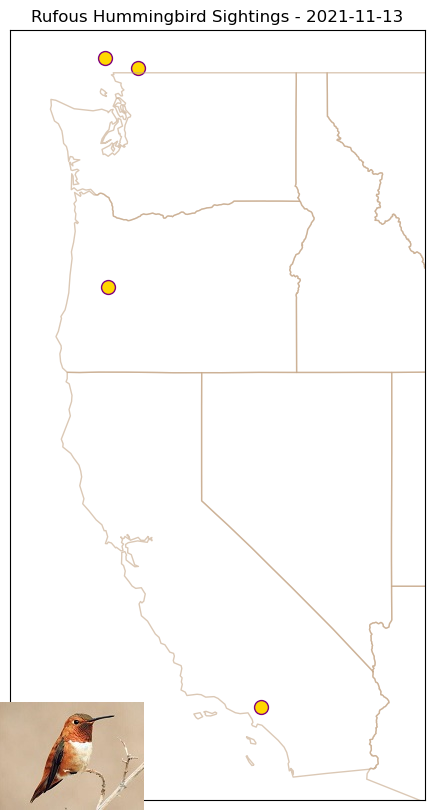

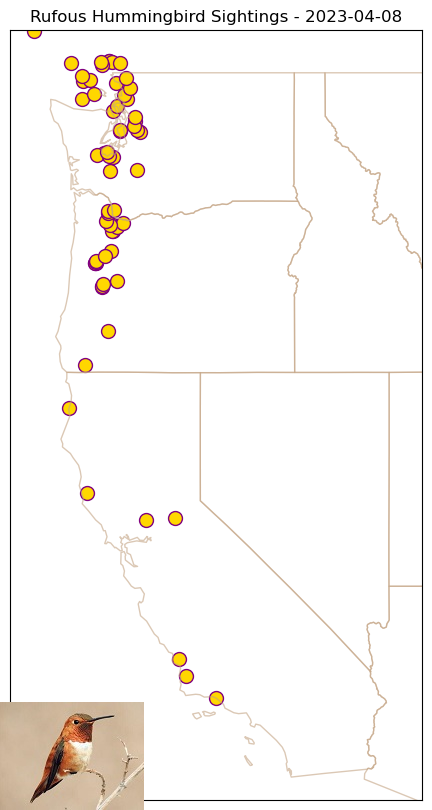

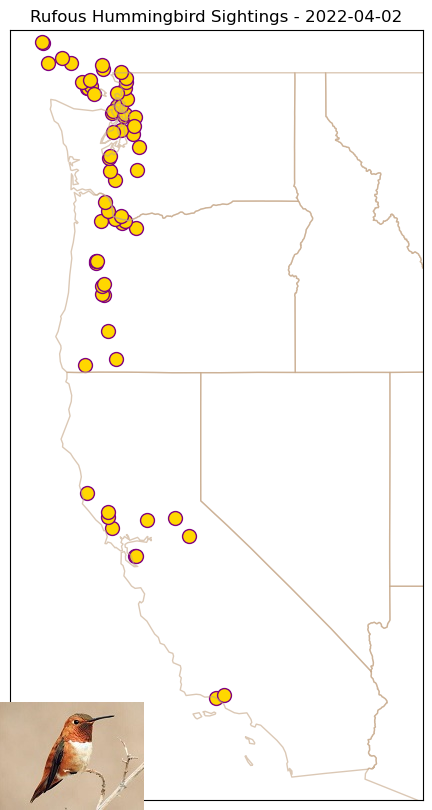

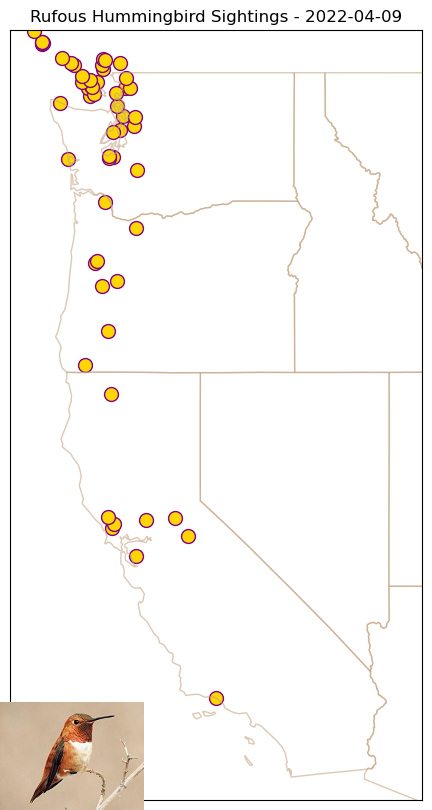

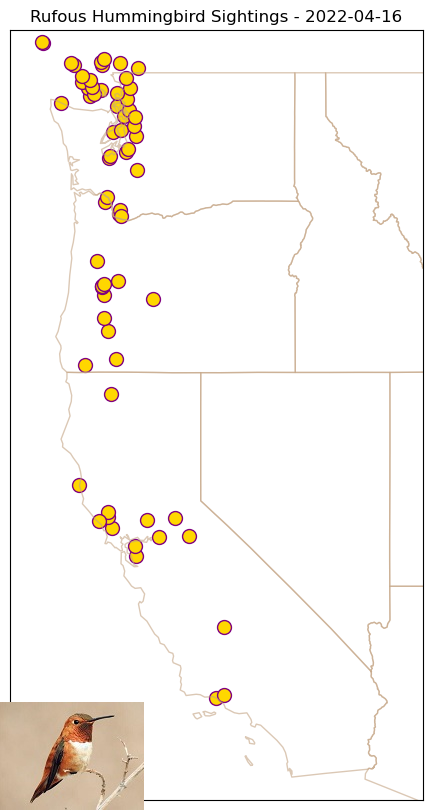

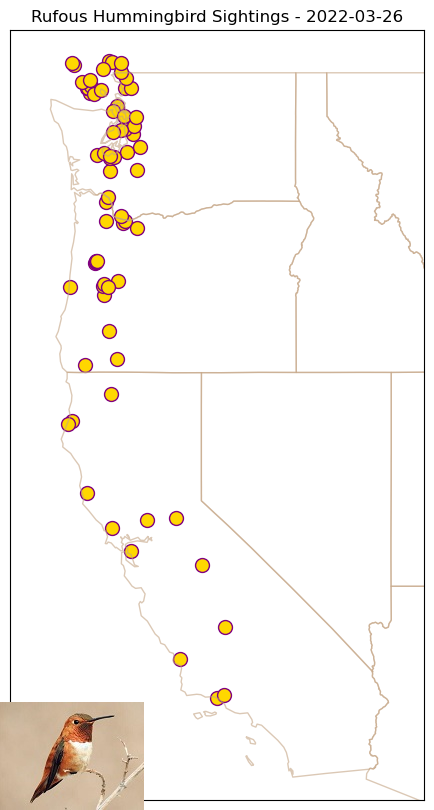

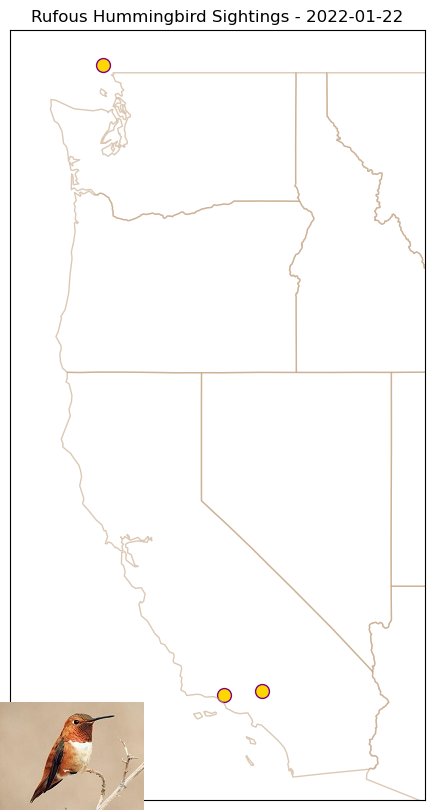

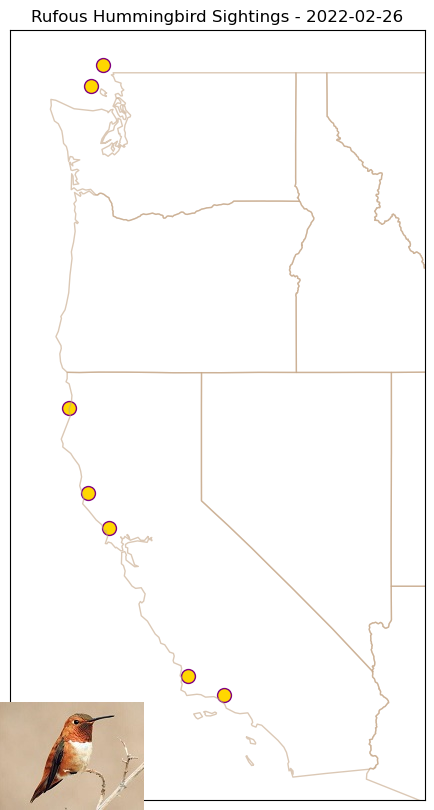

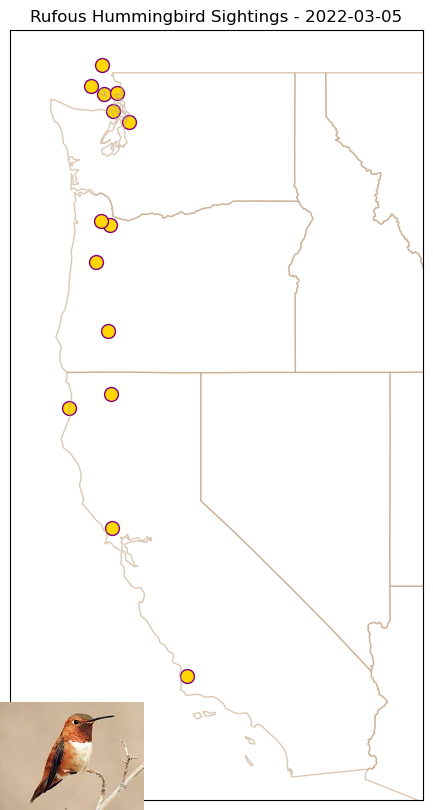

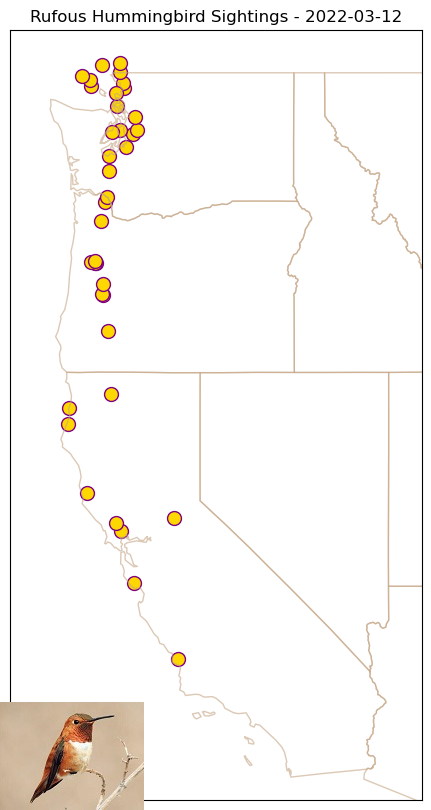

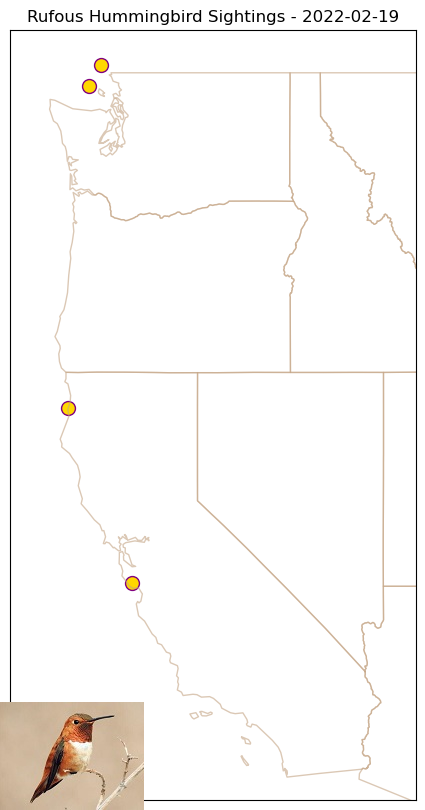

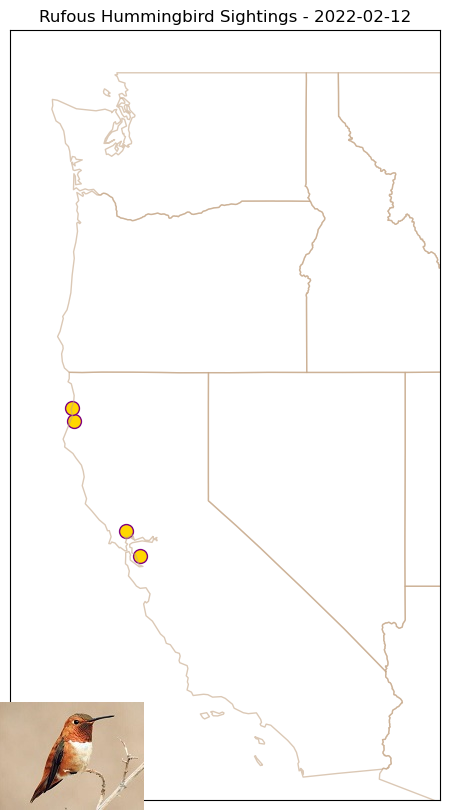

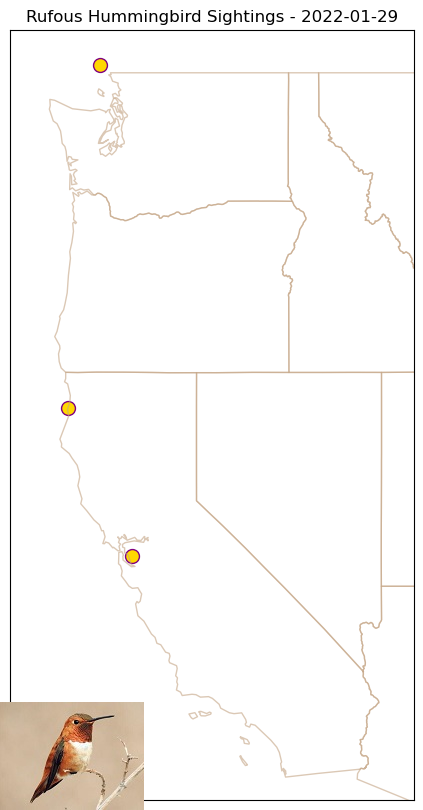

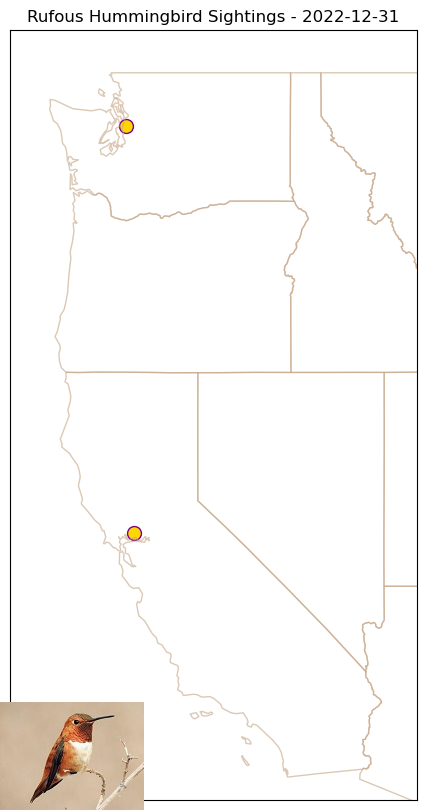

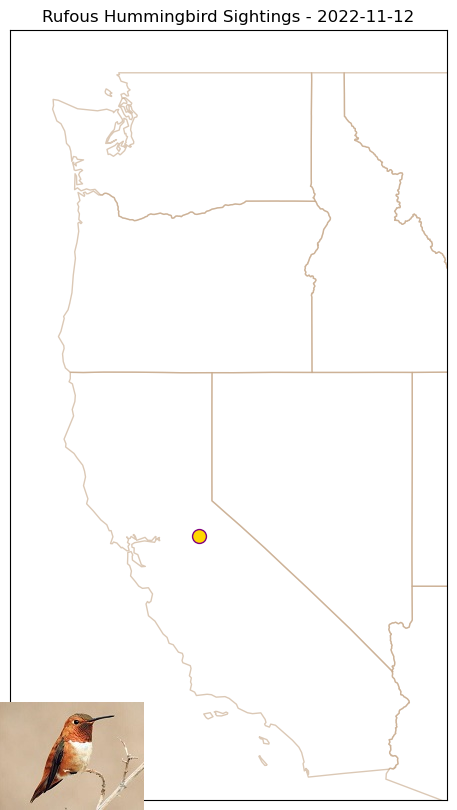

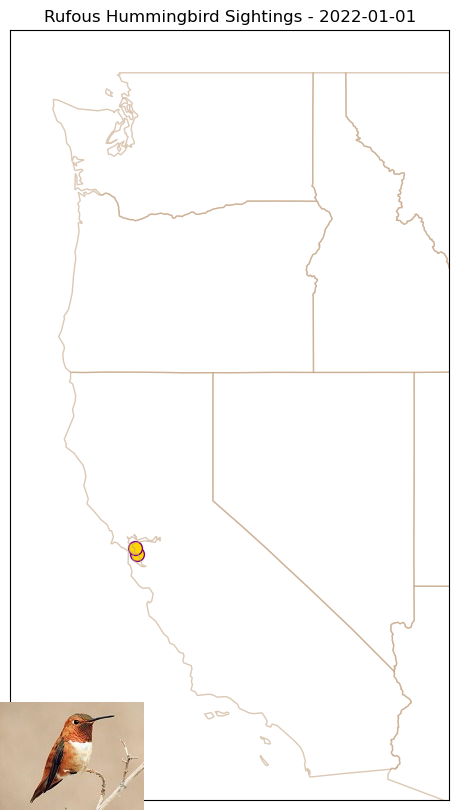

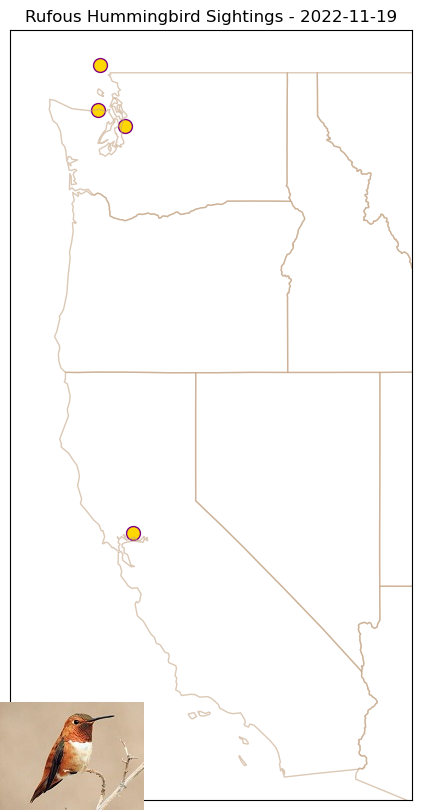

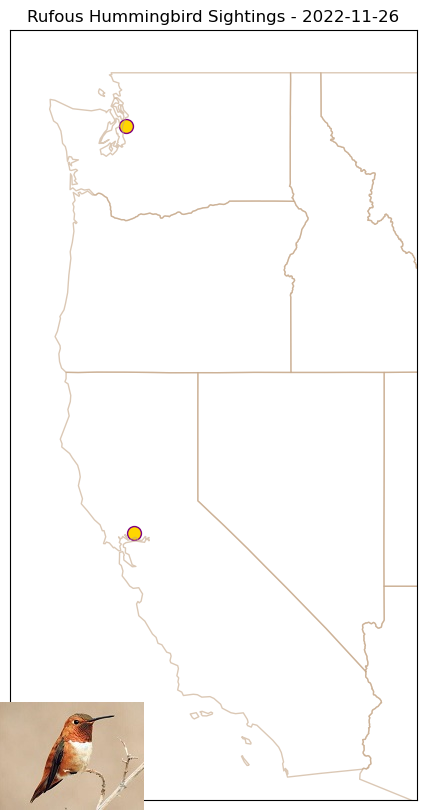

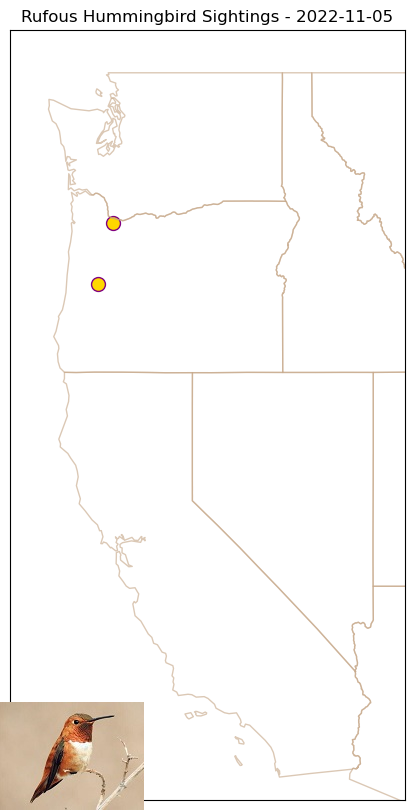

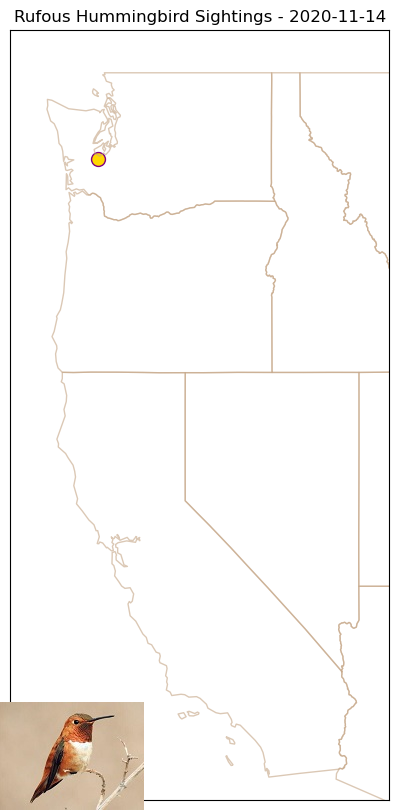

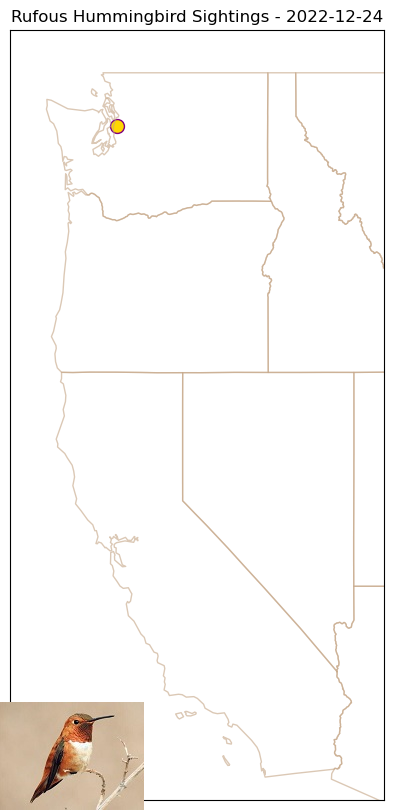

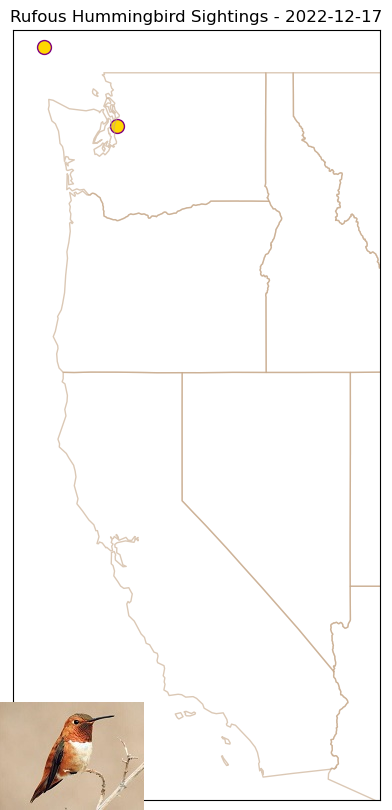

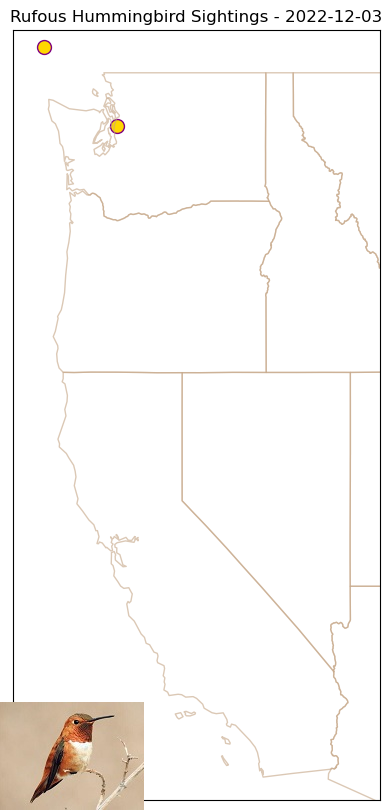

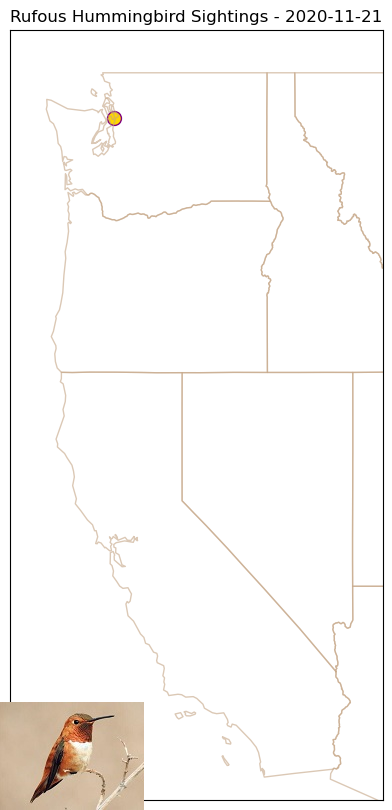

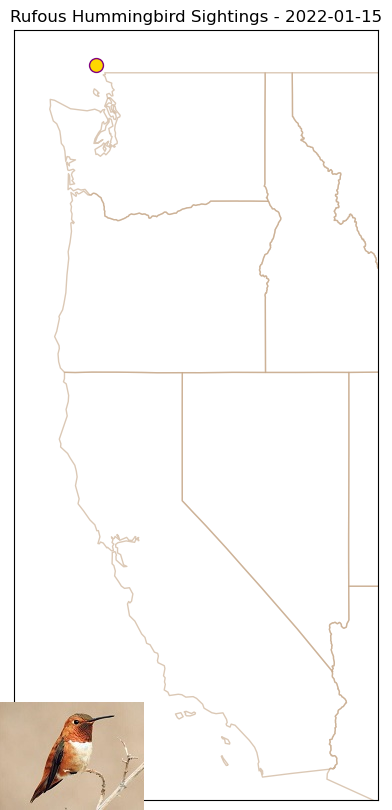

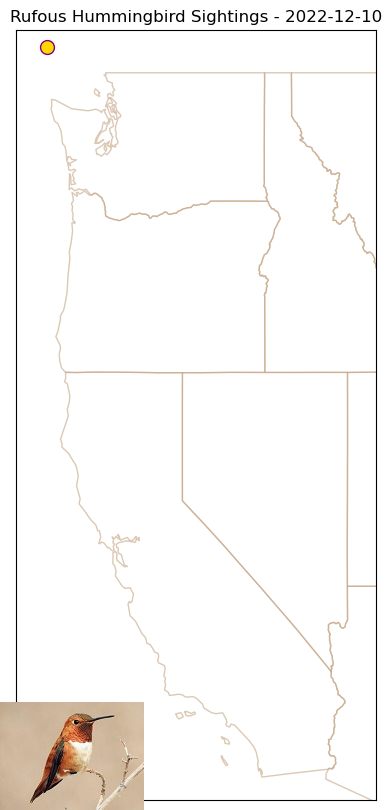

In [16]:
states = gpd.read_file("../../ideas/Esri/USA_States_Generalized.geojson")
img = mpimg.imread('../inputs/hmbd.jpg')
saturdays_data = rufous_hummingbird_gdf[rufous_hummingbird_gdf['datetime'].dt.weekday == 5]  # 5 corresponds to Saturday

minx, miny, maxx, maxy = -126, 32, -113, 50

# Plot each day's bird sightings on a separate map
days = saturdays_data['datetime'].unique()

for day in days:
    # Filter data for the specific day
    day_data = saturdays_data[saturdays_data['datetime'] == day]
    date_str = str(day).split()[0]

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.set_aspect('equal')
    states.boundary.plot(ax=ax, linewidth=1, color='#C4A484', alpha=0.6)
    ax.figure.figimage(img, xo=0, yo=0)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    # Plot bird sightings on top
    day_data.plot(ax=ax, marker='o', color='gold', edgecolor="purple", markersize=100, alpha=1)
    plt.tight_layout()
    plt.title(f'Rufous Hummingbird Sightings - {date_str}')
    plt.savefig(f"../outputs/RufousHummingbird-{date_str}.png", bbox_inches='tight')
    plt.show()